<a href="https://colab.research.google.com/github/caslabs/NeaurAsteroids/blob/master/SimplePrototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

insert training csv file


Saving asteroid_training.csv to asteroid_training (2).csv
insert testing csv file


Saving asteroid_testing.csv to asteroid_testing (2).csv
Train on 418 samples, validate on 178 samples
Epoch 1/200
418/418 [==============================] - 0s 543us/step - loss: 14.3774 - acc: 0.3493 - val_loss: 15.3534 - val_acc: 1.0000
Epoch 2/200
418/418 [==============================] - 0s 65us/step - loss: 14.2344 - acc: 0.5885 - val_loss: 15.2875 - val_acc: 0.0000e+00
Epoch 3/200
418/418 [==============================] - 0s 64us/step - loss: 14.2204 - acc: 0.0120 - val_loss: 15.2713 - val_acc: 0.4944
Epoch 4/200
418/418 [==============================] - 0s 62us/step - loss: 14.2127 - acc: 0.4833 - val_loss: 15.2684 - val_acc: 0.0618
Epoch 5/200
418/418 [==============================] - 0s 64us/step - loss: 14.2101 - acc: 0.0718 - val_loss: 15.2673 - val_acc: 0.2022
Epoch 6/200
418/418 [==============================] - 0s 67us/step - loss: 14.2095 - acc: 0.2656 - val_loss: 15.2666 - val_acc: 0.3539
Epoch 7/200
418/418 [==============================] - 0s 63us/step - loss: 1

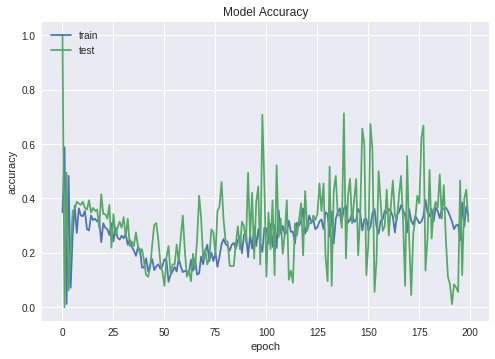

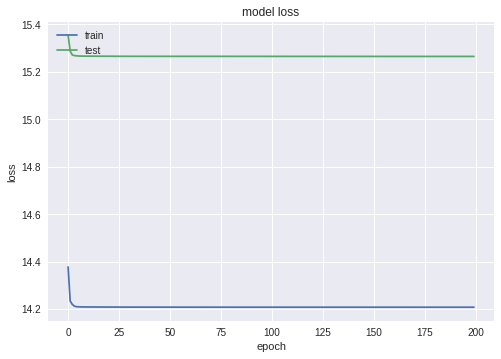

PREDICTION TEST ON CERES ASTEROID
[0.25035843 0.2502004  0.2499774  0.2494638 ]
0
PREDICITOIN TEST
I think Ceres belong to C class
TRUE VALUE
Ceres belong to C class


In [3]:
#note: no library installation is needed to install to run program. Google has everything covered :).
#libraries
import csv
import io
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import files


#Click Play after downloading the 2 CSV FILE

#for an actual test, go to the 2 links below and save as CSV FILE
print('insert training csv file')
uploadTrain = files.upload() #ASTEROID TRAINING CSV FILE CAN BE FOUND HERE https://docs.google.com/spreadsheets/d/1THuhR6meB4eppG16HOGeZN-31IxA3Lq_IKCnE8S_OM4/edit?usp=sharing
print('insert testing csv file')
uploadedTest = files.upload() #ASTEROID TESTING CSV FILE CAN FOUND HERE https://docs.google.com/spreadsheets/d/18LeUyAV5WZ4zVz4yuKXY3TDODJJdwnRKH_haXky8lAE/edit#gid=2019235681


#this reads the csv values

#1342 asteriods is not enough. NEED MORE DATA
train = pd.read_csv(io.StringIO(uploadTrain['asteroid_training.csv'].decode('utf-8'))).replace('\n','', regex=True).values
test  = pd.read_csv(io.StringIO(uploadedTest['asteroid_testing.csv'].decode('utf-8'))).replace('\n','', regex=True).values


trainX = train[:, 3:] #respective reflectance values
trainY = train[:,2] #label (composition type) of each asteroids in training set

testX = test[:, 3:] #respective reflectance values
testY = test[:,2] #label (composition type) of each asteroids in testing set



#Supervised Neural Network model. 3 Layers.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(46, activation='relu')) #relu layer
model.add(tf.keras.layers.Dense(46, activation='relu')) #relu layer
model.add(tf.keras.layers.Dense(4, activation='softmax')) #softmax layer for prediciton

#this uses Adam's Optimizer for its learning algorithmn 
model.compile(tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#actual training and validation  
history = model.fit(trainX, trainY, epochs=200, batch_size=46,
          validation_data=(testX, testY))



# basic graph of accuracy and loss.

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#prediction test. not good...must need high accuracy training

print('PREDICTION TEST ON CERES ASTEROID')
def matchOutputToClassCeres():
  predictions = model.predict(testX)
  print(predictions[0])
  predictionNum =np.argmax(predictions[0])
  print(predictionNum)
  print('PREDICITOIN TEST')
  if (predictionNum == 0):
    print('I think Ceres belong to C class')
  elif (predictionNum == 1):
    print('I think Ceres belong to E class')
  elif (predictionNum == 2):
    print('I think Ceres belong to X class')
  elif (predictionNum == 3):
    print('I think Ceres belong to S class')
  print('TRUE VALUE')
  print('Ceres belong to C class')
matchOutputToClassCeres()



